In [2]:
from numpy import *
from matplotlib import *
from pylab import *
from scipy import *
from numpy import*
import csv
import xlrd
import matplotlib.pyplot as plt

rc('text',usetex = True)
rc('font', family='serif')

from mpl_toolkits.mplot3d import Axes3D
from scipy.optimize import curve_fit
import openpyxl as ex

In [3]:
wb = ex.load_workbook("Planejamento das simulações - Modelo Analítico - NOVO.xlsx")
ws = wb['Simulações_Modelo']

In [4]:
N = 99
R1 = array([])
R2 = array([])
R3 = array([])
R4 = array([])
B_rem = array([])
Pi1 = array([])
Pi2 = array([])
B = array([])
W = array([])
efic = array([])
for i in range(4,N):
    R1 = append(R1, float(ws.cell(row=i, column=2).value))
    R2 = append(R2, float(ws.cell(row=i, column=3).value))
    R3 = append(R3, float(ws.cell(row=i, column=4).value))
    R4 = append(R4, float(ws.cell(row=i, column=12).value))
    B_rem = append(B_rem,1.26)
    B = append(B, float(ws.cell(row=i, column=5).value))
    #W = append(W, float(ws.cell(row=i, column=18).value))
    #efic = append(efic, 100*float(ws.cell(row=i, column=20).value))

In [4]:
R4

array([160. , 169. , 192. , 217. , 180.5, 189.5, 217.5, 254.5, 199. ,
       210. , 244. , 295. , 184.5, 192. , 215. , 243. , 209. , 212. ,
       240. , 274. , 224. , 230. , 268.5, 310. , 205. , 216. , 243. ,
       272. , 223.5, 237. , 267. , 302. , 241. , 253. , 290. , 331.5,
       230. , 251. , 256. , 278. , 307. , 237. , 260.5, 266. , 289. ,
       317. , 245. , 269.5, 276. , 304. , 330. , 256. , 281. , 281.5,
       313.5, 342.5, 248. , 271.5, 276. , 300.5, 325.5, 256. , 277. ,
       286.5, 311.5, 338. , 263. , 288. , 297. , 321. , 350.5, 269. ,
       296. , 300. , 331.5, 363. , 347.5, 379.5, 405.5, 443.5, 272. ,
       298.5, 304.5, 330. , 360.5, 281. , 305. , 309. , 340. , 373. ,
       285. , 311. , 322. , 352. , 383. ])

In [5]:
# definição de parâmetros importantes, como altura do gap, volume do gap e etc
h_gap = R3-R2
eta_vol = (B/B_rem)*((R3**2-R2**2)/(R4**2 - R3**2 + R2**2-20**2-R1**2))**0.5
V_in = R2**2 - R1**2
V_out = (R4**2 - R3**2)*pi
V_t = R4**2 - R1**2
V_magnet = (R4**2 - R3**2)*pi*2/3
V_gap = (R3**2 - R2**2)*pi
T= (V_gap/V_out)


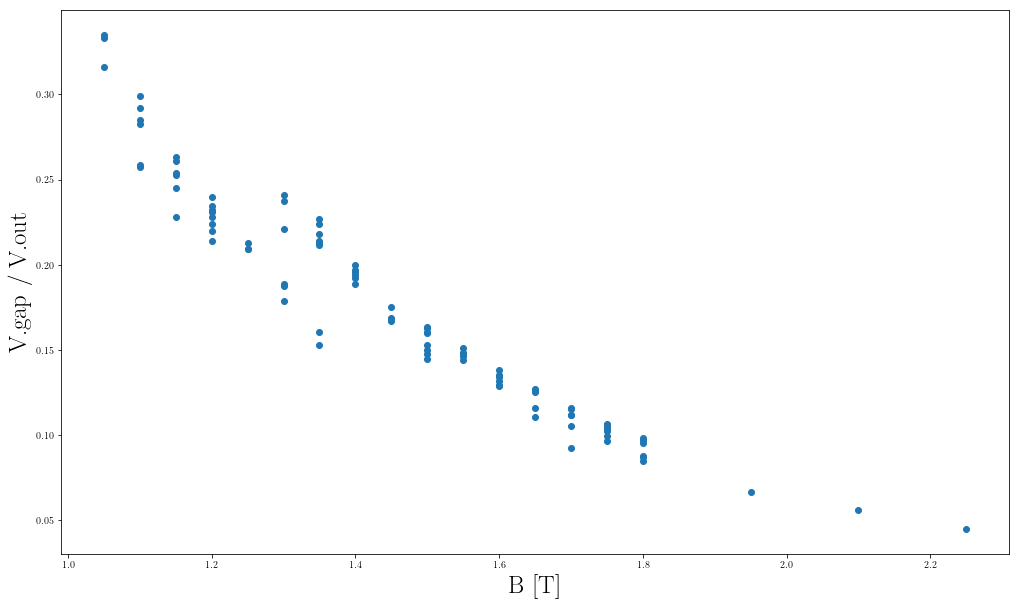

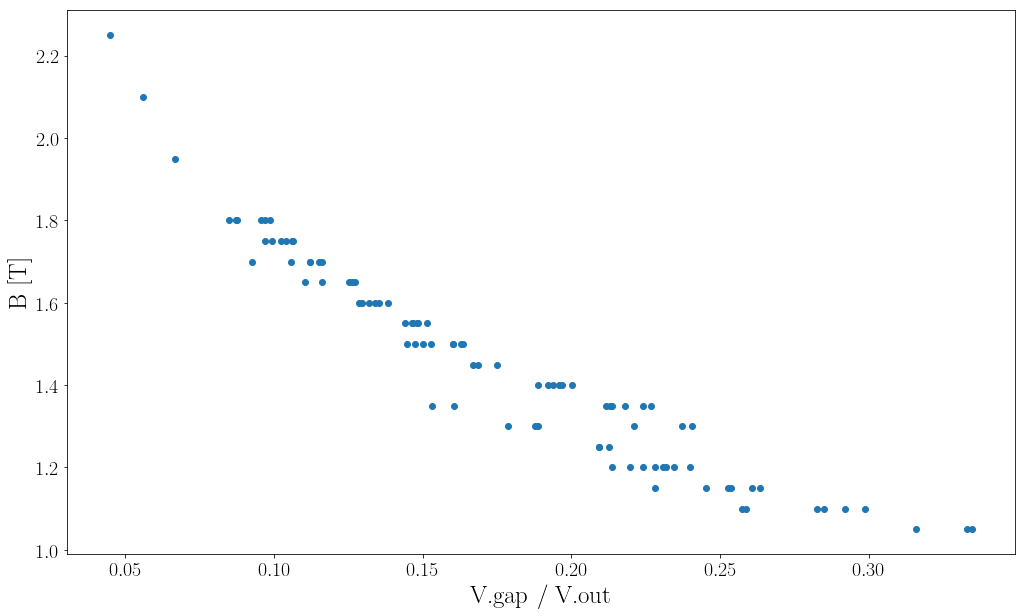

In [6]:
#plota B x V_gap / V_out (das simulações)
plt.plot(B,V_gap/V_out,'o')
plt.xlabel('B [T]',fontsize=25)
plt.ylabel('V.gap / V.out',fontsize=25)
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(12, 9)
plt.savefig('teste.png', format='png')
plt.rcParams['legend.fontsize'] = 18   
plt.rcParams['xtick.labelsize'] = 20
plt.rcParams['ytick.labelsize'] = 20
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(17, 10)
plt.savefig('teste.png', format='png')
plt.show()
#plota V_gap/V_out x B (da simulação)
plt.plot(V_gap/V_out,B,'o')
plt.ylabel('B [T]',fontsize=25)
plt.xlabel('V.gap / V.out',fontsize=25)
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(14, 8)
plt.savefig('teste.png', format='png')
plt.rcParams['legend.fontsize'] = 18   
plt.rcParams['xtick.labelsize'] = 20
plt.rcParams['ytick.labelsize'] = 20
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(17, 10)
plt.savefig('teste.png', format='png')
plt.show()

In [6]:
#define função para formato B=a*R2^b*R3^c*R4^d
def eta(X,a,c,d,e): 
    P2,P3,P4 = X
    return (a*(P2**c)*(P3**d)*(P4**e))
#. Faz o fitting dessa função, retornando R4.
M1 = curve_fit(eta,(R2,R3,B),R4)
print(M1[0])
# função para formato B=a*R2^b*R3^c*R4^d. Faz o fitting dessa função, retornando B.
M2 = curve_fit(eta,(R2,R3,R4),B)
print(M2[0])

#define função da forma B = a*(V_gap/V_out)^b
def eta2(X,a,e): 
    P2 = X
    return (a*(P2**e))
#Faz o fitting, entrando V_gap / V_magnet e retornando B
M3 = curve_fit(eta2,(T),B)
print(M3[0])

#define função da forma B = a*(V_gap)^c(V_out)^b -> para mostrar que c deve ser igual a b
def eta3(X,a,e,b): 
    P2,P3 = X
    return (a*(P2**e)*(P3**b))
#Faz o fitting, entrando V_gap, V_magnet e retornando B
M4 = curve_fit(eta3,(V_gap,V_magnet),B)
print(M4[0])


[ 1.20394013 -1.10308178  2.07803562  0.7396727 ]
[ 0.94241199  1.50307868 -2.73422634  1.240075  ]
[ 0.7067288  -0.39157847]
[ 0.72857944 -0.38111966  0.39354676]


In [7]:
T1 = (175**2 - 130**2)/(343**2 - 175**2)
a = eta((130,175,343),M2[0][0],M2[0][1],M2[0][2],M2[0][3])
b = eta2((T1),M3[0][0],M3[0][1])
print ("Remanência 1.26:\n")
print("B_max previsto pela forma 1 = %.2f" %(a))
print("B_max previsto pela forma 2 = %.2f\n" %(b))
print ("Remanência 1.37:\n")
print("B_max previsto pela forma 1 = %.2f" %(a*1.37/1.26))
print("B_max previsto pela forma 2 = %.2f" %(b*1.37/1.26))

Remanência 1.26:

B_max previsto pela forma 1 = 1.45
B_max previsto pela forma 2 = 1.46

Remanência 1.37:

B_max previsto pela forma 1 = 1.58
B_max previsto pela forma 2 = 1.58


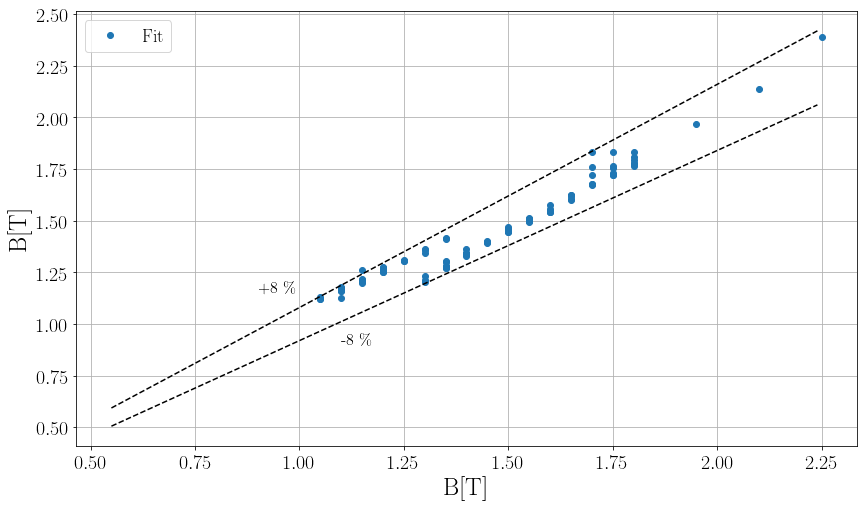

In [9]:
#plota o fitting M2 (que retorna B) pelo B simulado. Plota 2 retas indicando onde atingimos um erro de 8%
B_error = np.arange(0.55,2.25,0.01)
plt.plot(B,eta((R2,R3,R4),M2[0][0],M2[0][1],M2[0][2],M2[0][3]),'o',label  = 'Fit')
plt.plot(B_error,0.92*B_error,'k--')
plt.plot(B_error,1.08*B_error,'k--')
plt.grid()
plt.text(1.1, 0.9, '-8 $\%$', fontsize=16)
plt.text(0.9, 1.15, '+8 $\%$', fontsize=16)
plt.legend()
plt.savefig('MagnetFit1.png',format = 'png')
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(14, 8)
plt.ylabel('B[T]', fontsize = 25)
plt.xlabel('B[T]', fontsize = 25)
plt.rcParams['legend.fontsize'] = 18
plt.rcParams['xtick.labelsize'] = 20
plt.rcParams['ytick.labelsize'] = 20


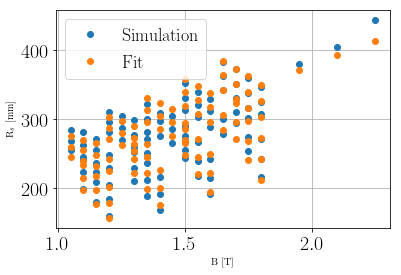

In [10]:
#plota R4 do fit (M1) e R4 simulado, dado certo B
plt.plot(B,R4,'o',label = 'Simulation')
plt.plot(B,eta((R2,R3,B),M1[0][0],M1[0][1],M1[0][2],M1[0][3]),'o',label  = 'Fit')
plt.grid()
plt.legend()
plt.ylabel('R$_s$ [mm]')
plt.xlabel('B [T]')
plt.savefig('MagnetFit.png',format = 'png', dpi=1000,bbox_inches='tight')

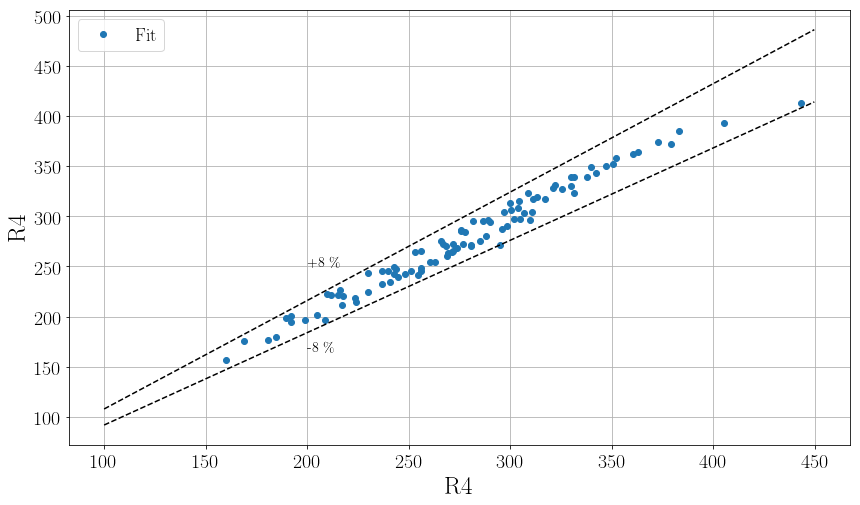

In [11]:
#plota o fitting M1 (que retorna R4) pelo R4 simulado. Plota 2 retas indicando onde atingimos um erro de 8%
R4_error = np.arange(100,450,0.1)
plt.plot(R4,eta((R2,R3,B),M1[0][0],M1[0][1],M1[0][2],M1[0][3]),'o',label  = 'Fit')
plt.plot(R4_error,0.92*R4_error,'k--')
plt.plot(R4_error,1.08*R4_error,'k--')
plt.grid()
plt.text(200, 250, '+8 $\%$', fontsize=14)
plt.text(200, 165, '-8 $\%$', fontsize=14)
plt.legend()
plt.xlabel('R4 ',fontsize = 25)
plt.ylabel('R4 ',fontsize = 25)
plt.savefig('MagnetFit.png',format = 'png', dpi=1000,bbox_inches='tight')
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(14, 8)
plt.rcParams['legend.fontsize'] = 18
plt.rcParams['xtick.labelsize'] = 20
plt.rcParams['ytick.labelsize'] = 20

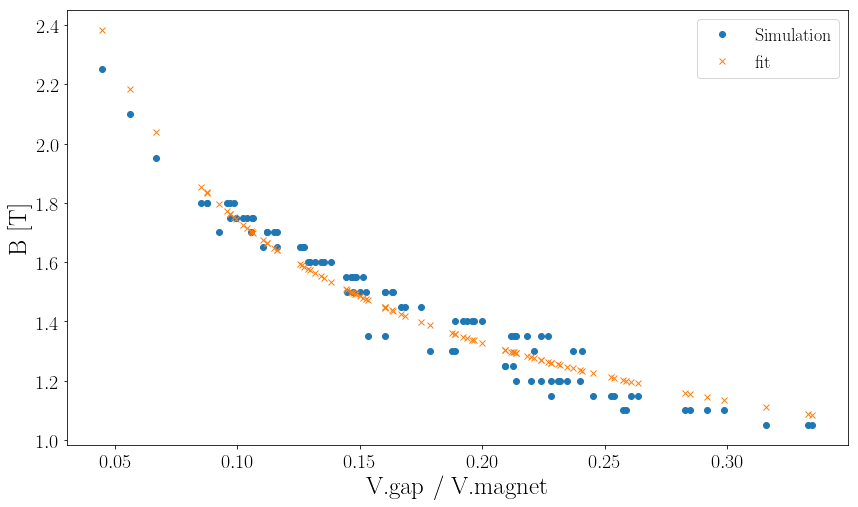

In [12]:
#plota V_gap/V_magnet simulado x B simulado, e plota o fitting da mesma relação
plt.plot(T,B,'o',label = 'Simulation')
plt.plot(T,eta2((T),M3[0][0],M3[0][1]),'x', label='fit')
plt.legend()
plt.xlabel('V.gap / V.magnet',fontsize = 25)
plt.ylabel('B [T]',fontsize = 25)
plt.savefig('MagnetFit.png',format = 'png', dpi=1000,bbox_inches='tight')
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(14, 8)
plt.rcParams['legend.fontsize'] = 21
plt.rcParams['xtick.labelsize'] = 20
plt.rcParams['ytick.labelsize'] = 20

9.617830361754223


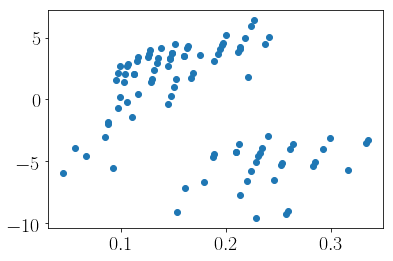

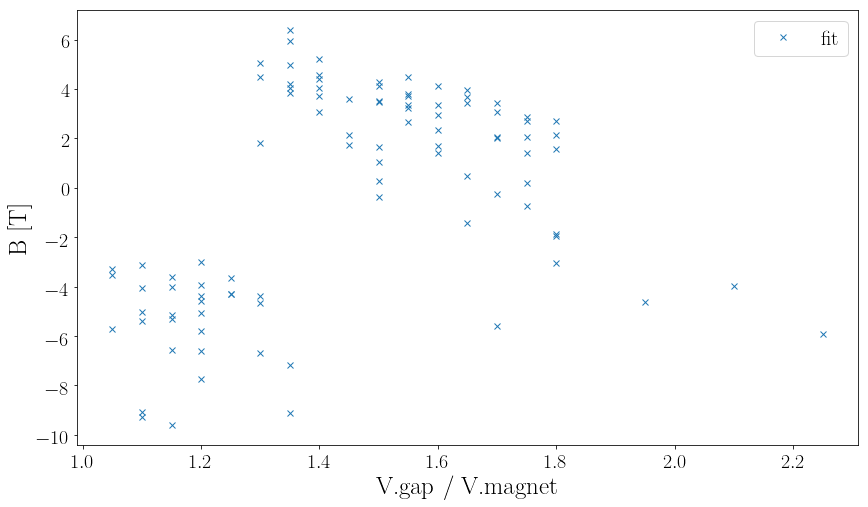

In [13]:
#plota o erro do fitting B x T (V_gap/V_magnet)
erro = ((B - eta2((T),M3[0][0],M3[0][1]))/B)*100
print (max(abs(erro)))
plt.plot(T,erro,'o',label = 'Simulation')
plt.show()
plt.plot(B,erro,'x', label='fit')
plt.legend()
plt.xlabel('V.gap / V.magnet',fontsize = 25)
plt.ylabel('B [T]',fontsize = 25)
plt.savefig('MagnetFit.png',format = 'png', dpi=1000,bbox_inches='tight')
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(14, 8)
plt.rcParams['legend.fontsize'] = 21
plt.rcParams['xtick.labelsize'] = 20
plt.rcParams['ytick.labelsize'] = 20

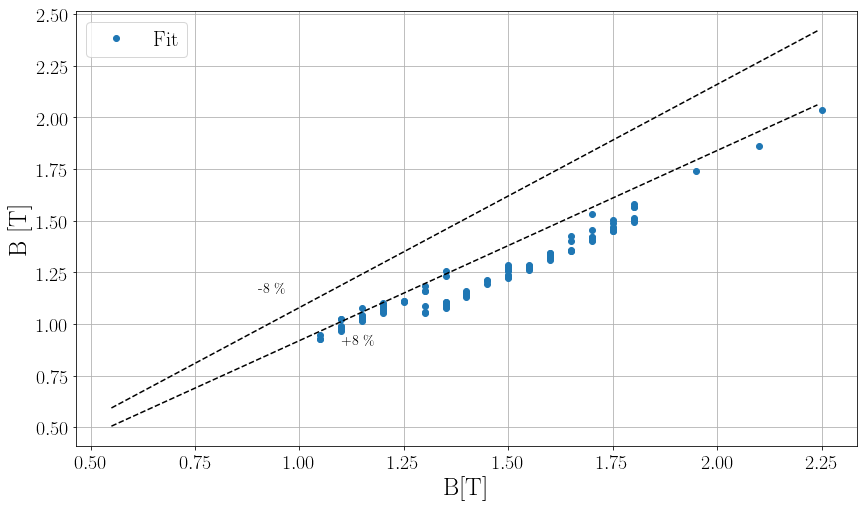

In [14]:
#plota o fitting M3 (que retorna B) pelo B simulado. Plota 2 retas indicando onde atingimos um erro de 8%
B_error = np.arange(0.55,2.25,0.01)
plt.plot(B,eta2((V_gap / V_magnet),M3[0][0],M3[0][1]),'o',label  = 'Fit')
plt.plot(B_error,0.92*B_error,'k--')
plt.plot(B_error,1.08*B_error,'k--')
plt.grid()
plt.text(1.1, 0.9, '+8 $\%$', fontsize=14)
plt.text(0.9, 1.15, '-8 $\%$', fontsize=14)

plt.legend()
plt.xlabel('B[T]',fontsize = 25)
plt.ylabel('B [T]',fontsize = 25)
plt.savefig('MagnetFit.png',format = 'png', dpi=1000,bbox_inches='tight')
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(14, 8)
plt.rcParams['legend.fontsize'] = 18
plt.rcParams['xtick.labelsize'] = 20
plt.rcParams['ytick.labelsize'] = 20

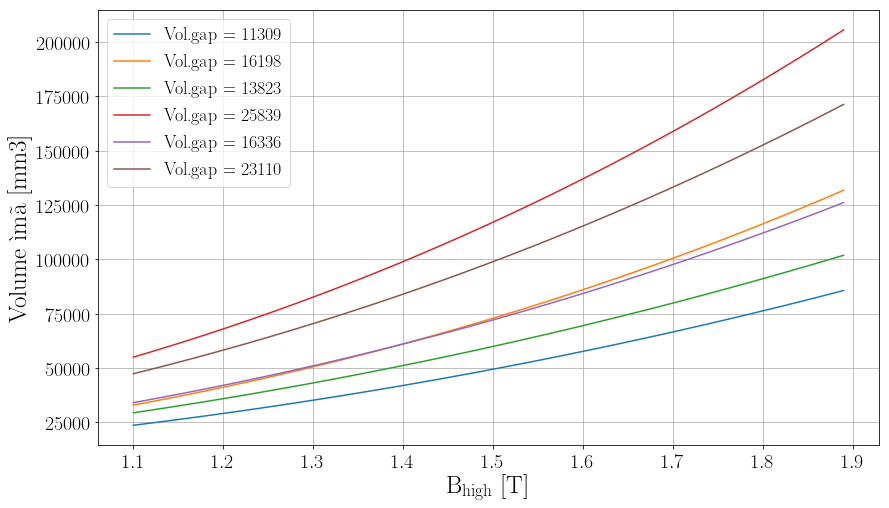

In [15]:
#traçar gráfico V_magnet x B_high para difererentes volumes de gap
V_magnet = (R4**2 - R3**2)*pi*2/3
V_gap = (R3**2 - R2**2)*pi
for i in range(0,34,4):
    if int(V_gap[i]) == 21441 or int(V_gap[i]) == 30237 or int(V_gap[i]) == 19654:
        continue
    M = curve_fit(eta2,B[i:i+4],V_magnet[i:i+4])
    plt.plot(arange(1.1,1.9,0.01),eta2(arange(1.1,1.9,0.01),M[0][0],M[0][1]), label = 'Vol.gap = {}'.format(int(V_gap[i])))
plt.grid()
plt.legend()
plt.ylabel('Volume ìmã [mm3]', fontsize = 25)
plt.xlabel('B$_\mathrm{high}$ [T]', fontsize = 25)
plt.rcParams['legend.fontsize'] = 18   

fig = matplotlib.pyplot.gcf()
fig.set_size_inches(14, 8)
plt.savefig('teste.png', format='png')

In [16]:
print (V_gap)
for i in range(0,34,4):
    print (V_gap[i])
for i in range(34,50,5):
    print (V_gap[i])
print (len(V_gap))

[11309.73355292 11309.73355292 11309.73355292 11309.73355292
 16198.83712007 16198.83712007 16198.83712007 16198.83712007
 21441.36986075 21441.36986075 21441.36986075 21441.36986075
 13823.0076758  13823.0076758  13823.0076758  13823.0076758
 19654.58903902 19654.58903902 19654.58903902 19654.58903902
 25839.59957578 25839.59957578 25839.59957578 25839.59957578
 16336.28179867 16336.28179867 16336.28179867 16336.28179867
 23110.34095797 23110.34095797 23110.34095797 23110.34095797
 30237.8292908  30237.8292908  30237.8292908  30237.8292908
 18849.55592154 18849.55592154 18849.55592154 18849.55592154
 18849.55592154 23954.64398362 23954.64398362 23954.64398362
 23954.64398362 23954.64398362 29216.81167839 29216.81167839
 29216.81167839 29216.81167839 29216.81167839 34636.05900583
 34636.05900583 34636.05900583 34636.05900583 34636.05900583
 20734.51151369 20734.51151369 20734.51151369 20734.51151369
 20734.51151369 26310.83847381 26310.83847381 26310.83847381
 26310.83847381 26310.8384

[20.  20.  20.  20.  27.5]
[160.  169.  192.  217.  180.5]
[27.5 27.5 27.5 27.5 35. ]
[180.5 189.5 217.5 254.5 199. ]
[35. 35. 35. 35. 20.]
[199.  210.  244.  295.  184.5]
[20.  20.  20.  20.  27.5]
[184.5 192.  215.  243.  209. ]
[27.5 27.5 27.5 27.5 35. ]
[209. 212. 240. 274. 224.]
[35. 35. 35. 35. 20.]
[224.  230.  268.5 310.  205. ]
[20.  20.  20.  20.  27.5]
[205.  216.  243.  272.  223.5]
[27.5 27.5 27.5 27.5 35. ]
[223.5 237.  267.  302.  241. ]
[35. 35. 35. 35. 20.]
[241.  253.  290.  331.5 230. ]
[20. 20. 20. 20. 20.]
[230. 251. 256. 278. 307.]
[20. 25. 25. 25. 25.]
[307.  237.  260.5 266.  289. ]
[25. 25. 30. 30. 30.]
[289.  317.  245.  269.5 276. ]
[30. 30. 30. 35. 35.]
[276. 304. 330. 256. 281.]
[35. 35. 35. 35. 20.]
[281.  281.5 313.5 342.5 248. ]


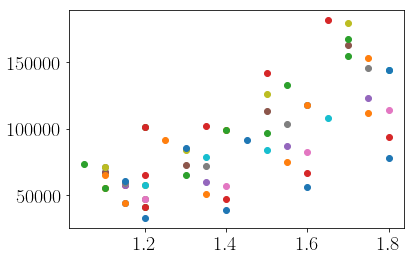

In [17]:
for i in range(0,54,4):
    print (h_gap[i:i+5])
    print (R4[i:i+5])
    plt.plot(B[i:i+5],V_magnet[i:i+5],'o') 

In [18]:
#plota a energia no gap pelo campo neste
h_gap = R3-R2
for i in range(0,52):
    if W[i] == '':
        continue
    else:
        plt.plot(B[i],float(W[i]),'ro')
    plt.grid()
plt.rcParams['legend.fontsize'] = 18   

fig = matplotlib.pyplot.gcf()
plt.savefig('teste.png', format='png')

plt.xlabel('B[T]', fontsize = 25)
plt.ylabel('Energia no gap', fontsize = 25)
plt.rcParams['legend.fontsize'] = 18   
plt.rcParams['xtick.labelsize'] = 20
plt.rcParams['ytick.labelsize'] = 20
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(14, 8)
plt.savefig('teste.png', format='png')

IndexError: index 0 is out of bounds for axis 0 with size 0

In [ ]:
#plota a eficiência do ímã x o campo gerado
J = h_gap
for i in range(0,90):
    if B[i] > 1.8:
        continue
    '''if J[i] == 20:
        a = 'ro'
    elif J[i] == 35:
        a = 'kx'
    elif J[i] == 30:
        a = 'bo'
    elif J[i] == 27.5:
        a = 'go' '''
    if efic[i]==0:
        continue
    else:
        plt.plot(B[i],efic[i], 'ro')
    plt.grid() 
    
plt.xlabel('B[T]', fontsize = 25)
plt.ylabel('Eficiência', fontsize = 25)
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(8, 5)
plt.savefig('teste.png', format='png')
'''plt.rcParams['legend.fontsize'] = 18   
plt.rcParams['xtick.labelsize'] = 20
plt.rcParams['ytick.labelsize'] = 20'''
fig = matplotlib.pyplot.gcf()
#fig.set_size_inches(17, 10)
plt.savefig('teste.png', format='png')

In [ ]:
R4 - R3

In [ ]:
L = R4+R3
J = h_gap

for i in range(77):
    if efic[i]==0:
        continue
    else:
        plt.plot(T[i]
                 ,efic[i],'rx')
        plt.grid()
        plt.ylabel('eficiencia')
        plt.xlabel('B$_\mathrm{high}$ [T]')

In [ ]:
efic

In [ ]:
#Mudança de fitting. Agora assumindo formato exponencial
def eta3(X,a,c,d,e): 
    P2,P3,P4 = X
    return (a*(c**P2)*(d**P3)*(e**P4))
#. Faz o fitting dessa função, retornando R4.
M5 = curve_fit(eta3,(R2,R3,B),R4)
print(M5[0])

def eta4(X,a,c): 
    P2 = X
    return (a*(c**P2))
#. Faz o fitting dessa função, retornando R4.
M6 = curve_fit(eta4,(V_gap/V_magnet),B)
print(M6[0])

In [ ]:
R4_error = np.arange(150,350,0.05)
plt.plot(R4,eta3((R2,R3,B),M5[0][0],M5[0][1],M5[0][2],M5[0][3]),'o',label  = 'Fit')
plt.plot(R4_error,0.92*R4_error,'k--')
plt.plot(R4_error,1.08*R4_error,'k--')
plt.grid()

plt.legend()
plt.xlabel('B[T]',fontsize = 25)
plt.ylabel('B [T]',fontsize = 25)
plt.savefig('MagnetFit.png',format = 'png', dpi=1000,bbox_inches='tight')
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(14, 8)
plt.rcParams['legend.fontsize'] = 18
plt.rcParams['xtick.labelsize'] = 20
plt.rcParams['ytick.labelsize'] = 20

In [ ]:
B_error = np.arange(0.55,1.85,0.01)
plt.plot(B,eta3((R2,R3,R4),M5[0][0],M5[0][1],M5[0][2],M5[0][3]),'o',label  = 'Fit')
plt.plot(B_error,0.92*B_error,'k--')
plt.plot(B_error,1.08*B_error,'k--')
plt.grid()
plt.text(1.1, 0.9, '-8 $\%$', fontsize=16)
plt.text(0.9, 1.15, '+8 $\%$', fontsize=16)
plt.legend()
plt.savefig('MagnetFit1.png',format = 'png', dpi=1000,bbox_inches='tight')
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(14, 8)
plt.ylabel('B[T]', fontsize = 25)
plt.xlabel('B[T]', fontsize = 25)
plt.rcParams['legend.fontsize'] = 18
plt.rcParams['xtick.labelsize'] = 20
plt.rcParams['ytick.labelsize'] = 20


In [ ]:
plt.plot(T,B,'o',label = 'Simulation')
plt.plot(T,eta4((T),M6[0][0],M6[0][1]),'x', label='fit')
plt.legend()
plt.xlabel('V.gap / V.magnet',fontsize = 25)
plt.ylabel('B [T]',fontsize = 25)
plt.savefig('MagnetFit.png',format = 'png', dpi=1000,bbox_inches='tight')
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(14, 8)
plt.rcParams['legend.fontsize'] = 21
plt.rcParams['xtick.labelsize'] = 20
plt.rcParams['ytick.labelsize'] = 20

In [ ]:
T